In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

Loading training dataset

In [2]:
df=pd.read_csv(r'train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
df.head()

No. of Rows : 159571
No. of Columns : 8


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


ID, comment_text has object data type and other columns have int64 data type.

Loading test data

In [5]:
dft=pd.read_csv(r'testdata.csv')
dft

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [6]:
print('No. of Rows :',dft.shape[0])
print('No. of Columns :',dft.shape[1])
dft.head()

No. of Rows : 153164
No. of Columns : 2


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Checking Null Values

In [7]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [8]:
dft.isnull().sum()

id              0
comment_text    0
dtype: int64

Train and Test datasets doesnt have any missing values.

In [9]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

As per observation, text processing is required for this column.

In [10]:
list1 = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [11]:
for i in list1:
    print('Value counts for: ',i)
    print(df[i].value_counts())
    print('===========================')

Value counts for:  malignant
0    144277
1     15294
Name: malignant, dtype: int64
Value counts for:  highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
Value counts for:  rude
0    151122
1      8449
Name: rude, dtype: int64
Value counts for:  threat
0    159093
1       478
Name: threat, dtype: int64
Value counts for:  abuse
0    151694
1      7877
Name: abuse, dtype: int64
Value counts for:  loathe
0    158166
1      1405
Name: loathe, dtype: int64


Dataset is imbalanced and require technique to balance the dataset.

EDA

<AxesSubplot:xlabel='malignant', ylabel='count'>

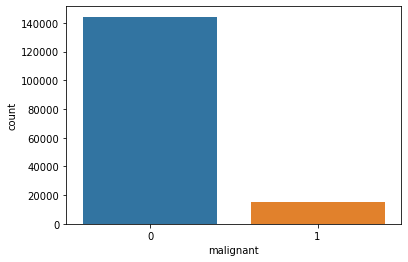

In [12]:
sns.countplot(df['malignant'])

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

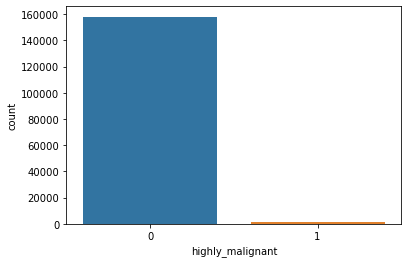

In [13]:
sns.countplot(df['highly_malignant'])

<AxesSubplot:xlabel='rude', ylabel='count'>

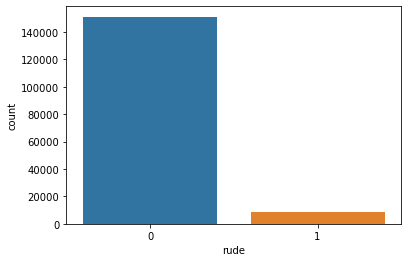

In [14]:
sns.countplot(df['rude'])

<AxesSubplot:xlabel='threat', ylabel='count'>

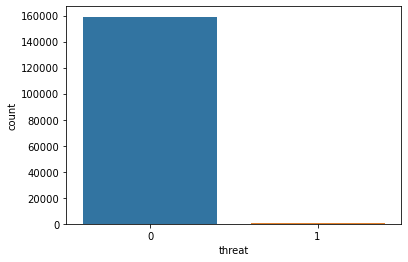

In [15]:
sns.countplot(df['threat'])

<AxesSubplot:xlabel='abuse', ylabel='count'>

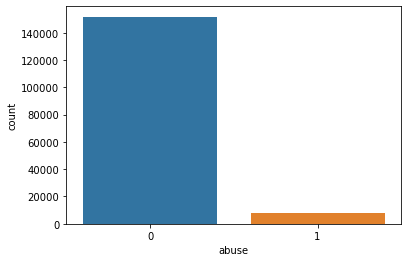

In [16]:
sns.countplot(df['abuse'])

<AxesSubplot:xlabel='loathe', ylabel='count'>

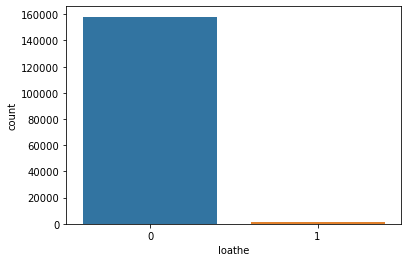

In [17]:
sns.countplot(df['loathe'])

As per observation, maximum negative comments belongs to malignant, rude and abuse columns however threat columns have minimum negative comments.

In [18]:
df_new = df.iloc[:,2:].sum()

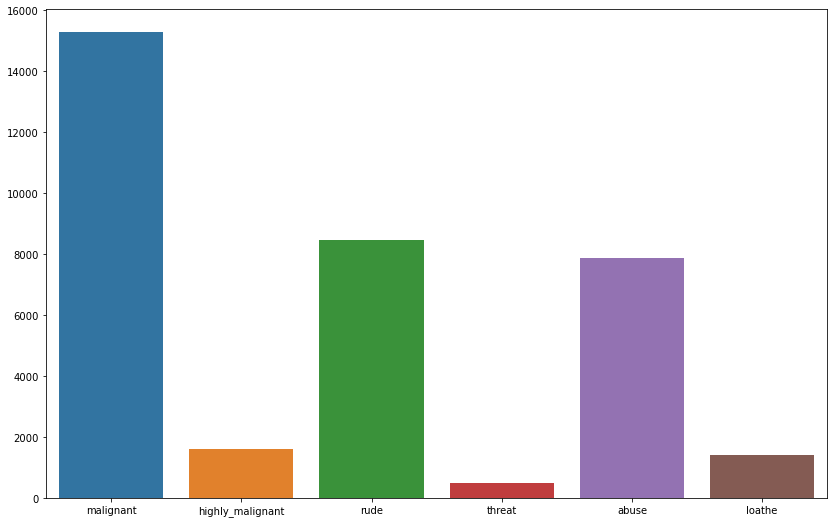

In [19]:
plt.figure(figsize=(14,9))
ax = sns.barplot(df_new.index, df_new.values)

Observation:
1) Out of total comments most of negative comments are belong to malignant and rude category.
2) Threat category has very less comments.

In [20]:
#Checking correlation of the dataset
corr=df.corr()  
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


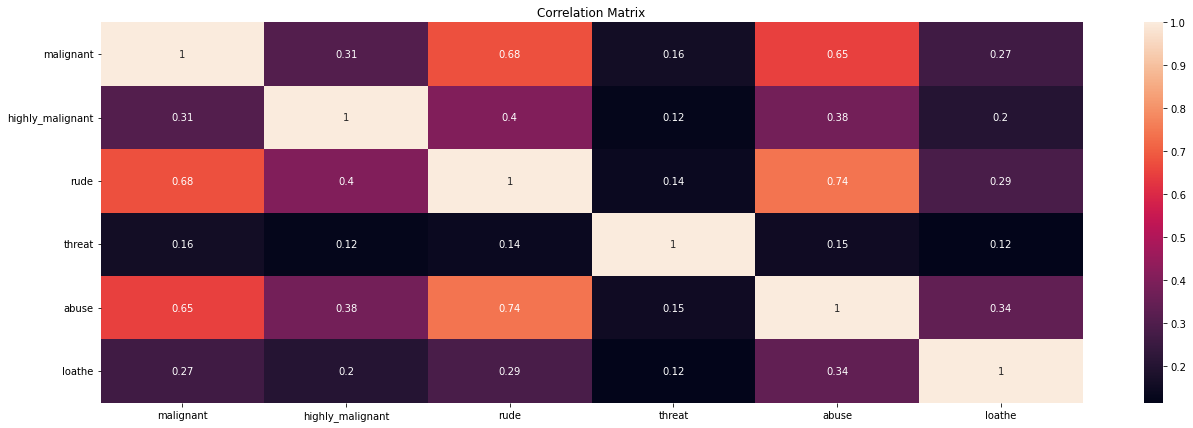

In [21]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Observations:
1) Threat is highly negatively correlated with every feature.
2) Rude and abuse are highly positively correlated.

Data preprocessing

Removing Id column from train and test dataset.

In [22]:
df.drop('id',axis=1,inplace=True)
dft.drop('id',axis=1,inplace=True)

In [23]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aakash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = stopwords.words('english')

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
df['comment_text'] = df['comment_text'].replace('\n',' ')

In [28]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aakash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aakash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
df['comment_text'] = df['comment_text'].apply(clean_comments)
df['comment_text'].head()

0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: comment_text, dtype: object

In [32]:
dft['comment_text'] = dft['comment_text'].apply(clean_comments)
dft['comment_text'].head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                           source zawe ashton lapland
3    look back source information updated correct f...
4                             anonymously edit article
Name: comment_text, dtype: object

In [33]:
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')

In [34]:
x = tf_vec.fit_transform(df['comment_text']).toarray()

In [35]:
output_labels= df.columns[1:7]

In [36]:
from scipy.sparse import csr_matrix
y = csr_matrix(df[output_labels]).toarray()

In [37]:
test_vec = tf_vec.fit_transform(dft['comment_text'])
test_vec

<153164x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2138199 stored elements in Compressed Sparse Row format>

In [42]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [43]:
import timeit, sys
import tqdm.notebook as tqdm

In [44]:
def build_models(models,x,y,test_size=0.33,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [48]:
!pip install scikit-multilearn

In [50]:
from skmultilearn.problem_transform import BinaryRelevance
models = {
          "Logistic Regression": {"name": LogisticRegression()} }

# Taking one forth of the total data for training and testing purpose
half = len(df)//4
trained_models = build_models(models,x[:half,:],y[:half,:])

Building Models:   0%|          | 0/1 [00:00<?, ?it/s]


Current Model in Progress: Logistic Regression 
Training:  BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.022066084314470186
	Accuracy Score: 0.9123433345993164
              precision    recall  f1-score   support

           0       0.92      0.51      0.66      1281
           1       0.61      0.18      0.28       150
           2       0.95      0.54      0.69       724
           3       0.00      0.00      0.00        44
           4       0.81      0.45      0.58       650
           5       0.88      0.13      0.22       109

   micro avg       0.89      0.47      0.61      2958
   macro avg       0.70      0.30      0.40      2958
weighted avg       0.87      0.47      0.60      2958
 samples avg       0.05      0.04      0.04      2958
Completed in [30.167622299999948 sec.]


In [51]:
# selecting the best model
best_model = trained_models['Logistic Regression']['trained']

# saving the best classification model
import joblib
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

In [52]:
# saving the best classification model
import joblib
best_model = joblib.load('Malignant_comments_classifier.pkl')


In [53]:
test_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
predict_test = best_model.predict(test_vec.toarray())

# Saving predicted values into a CSV file
pd.DataFrame(predict_test).to_csv('Predicted_test_output.csv')

In [59]:
df.to_csv('test_dataset_predictions2.csv', index=False)